<a href="https://colab.research.google.com/github/reypowgithub/Tugas_Visdat_TelU_2023/blob/main/Tugas_4_Week9_Reynhard_Powiwi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CII4L3 VISUALISASI DATA**

---

# Assignment Week-9

---

<p>Nama  = Reynhard Powiwi</p>
<p>NIM   = 1301204091</p>
<p>Kelas = IF-44-PIL-DS02 📚🎓</p>

---


**Link Tambahan**
* [Kaggle Dataset](https://www.kaggle.com/datasets/nelgiriyewithana/mcdonalds-store-reviews/data)
* [Project Kaggle](https://www.kaggle.com/code/reypow/wordcloud-mcd)

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/logomcd/logomcd.png
/kaggle/input/logomcd/icecream.png
/kaggle/input/logomcd/logomcdnotransparant.png
/kaggle/input/logomcd/kentanggoreng.png
/kaggle/input/mcdonalds-store-reviews/McDonald_s_Reviews.csv


**Import Library**

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns                            # Import seaborn for data visualization
import collections                               # Import collections for word frequency counting
import re                                        # Import re for regular expressions
from sklearn.preprocessing import LabelEncoder   # Import LabelEncoder for label encoding
from nltk.tokenize import word_tokenize          # Import word_tokenize for tokenization
from nltk.corpus import stopwords                # Import stopwords for text preprocessing
from nltk.stem import SnowballStemmer            # Import SnowballStemmer for stemming
from wordcloud import WordCloud, ImageColorGenerator  # Import WordCloud for generating word clouds

# Exploration Data Analysis

In [ ]:
#Membaca data
data = pd.read_csv("/kaggle/input/mcdonalds-store-reviews/McDonald_s_Reviews.csv", sep =',', encoding='latin-1')
data.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,"Why does it look like someone spit on my food?\nI had a normal transaction, everyone was chill and polite, but now i dont want to eat this. Im trying not to think about what this milky white/clear substance is all over my food, i d*** sure am not coming back.",1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,"It'd McDonalds. It is what it is as far as the food and atmosphere go. The staff here does make a difference. They are all friendly, accommodating and always smiling. Makes for a more pleasant experience than many other fast food places.",4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and checked it in.\nLine was not moving so I had to leave otherwise Iï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½d be late for work.\nNever got the refund in the app.\nI called them and they said I could only get my money back in person because it was stuck in the system.\nWent there in person the next day and the manager told me she wasnï¿,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ customer service was quick and p,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, and she still manage to mess it up , it was suppose to be a large meal double filet of fish with large fries , no cheese . It was all wrong , they either need to pay close attention to the order being made , understand English or they need not to work at a drive thru",1 star


In [ ]:
#Melihat informasi pada data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33396 entries, 0 to 33395
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewer_id    33396 non-null  int64  
 1   store_name     33396 non-null  object 
 2   category       33396 non-null  object 
 3   store_address  33396 non-null  object 
 4   latitude       32736 non-null  float64
 5   longitude      32736 non-null  float64
 6   rating_count   33396 non-null  object 
 7   review_time    33396 non-null  object 
 8   review         33396 non-null  object 
 9   rating         33396 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.5+ MB


In [ ]:
#Melihat apakah dalam data frame terdapat data yang kosong
data.isna().sum()

reviewer_id        0
store_name         0
category           0
store_address      0
latitude         660
longitude        660
rating_count       0
review_time        0
review             0
rating             0
dtype: int64

In [ ]:
# Menghapus baris data yang kosong
data.dropna(inplace = True)
data.isna().sum()

reviewer_id      0
store_name       0
category         0
store_address    0
latitude         0
longitude        0
rating_count     0
review_time      0
review           0
rating           0
dtype: int64

In [ ]:
# Melihat variansi pada kolom rating
data['rating'].unique()

array(['1 star', '4 stars', '5 stars', '2 stars', '3 stars'], dtype=object)

In [ ]:
# mengubah nilai dalam kolom 'rating' dari data frame menjadi representasi numerik
encoder = LabelEncoder()
data['rating'] = encoder.fit_transform(data['rating']) + 1
data['rating'].unique()

array([1, 4, 5, 2, 3])

**Split kolom Store_address**

Kemudian dilakukan proses pengolahan data yang bertujuan untuk memisahkan alamat toko menjadi beberapa kolom terpisah seperti alamat, kota, negara bagian (state), kode pos, dan negara.

Fungsi-fungsi berikut ini dipanggil untuk setiap baris dalam kolom 'store_address' dari data frame:

* **get_address**: Mengambil alamat dari string Store_address.
* **get_city**: Mengambil nama kota dari string Store_address.
* **get_state**: Mengambil negara bagian (state) dari string Store_address.
* **get_zipcode**: Mengambil kode pos dari string Store_address.
* **get_country**: Mengambil nama negara dari string Store_address.

Setelah itu, hasil pemisahan disimpan dalam kolom baru seperti 'address', 'city', 'state', 'zipcode', dan 'country'. Pemisahan ini dilakukan menggunakan fungsi apply() yang diterapkan pada kolom 'store_address' dengan menggunakan lambda function.



In [ ]:
def get_address(address):
    if address == 'By Mandalay Bay, 3999 S Las Vegas Blvd, Las Vegas, NV 89119, United States':
        return address.split(',')[1]
    else :
        return address.split(',')[0]

def get_city(city):
    if city == 'By Mandalay Bay, 3999 S Las Vegas Blvd, Las Vegas, NV 89119, United States':
        return city.split(',')[2]
    else :
        return city.split(',')[1]

def get_state(state):
    if state == 'By Mandalay Bay, 3999 S Las Vegas Blvd, Las Vegas, NV 89119, United States':
        return state.split(',')[3].split(' ')[1]
    else :
        return state.split(',')[2].split(' ')[1]

def get_zipcode(zipcode):
    if zipcode == 'By Mandalay Bay, 3999 S Las Vegas Blvd, Las Vegas, NV 89119, United States':
        return zipcode.split(',')[3].split(' ')[2]
    else :
        return zipcode.split(',')[2].split(' ')[2]

def get_country(country):
    if country == 'By Mandalay Bay, 3999 S Las Vegas Blvd, Las Vegas, NV 89119, United States':
        return country.split(',')[4]
    else :
        return country.split(',')[3]

data['address'] = data['store_address'].apply(lambda x : get_address(x))
data['city'] = data['store_address'].apply(lambda x : get_city(x))
data['state'] = data['store_address'].apply(lambda x : get_state(x))
data['zipcode'] = data['store_address'].apply(lambda x : get_zipcode(x))
data['country'] = data['store_address'].apply(lambda x : get_country(x))

In [ ]:
pd.set_option('display.max_colwidth', None)

**Clean and Tokenize Data**

In [ ]:
#fungsi berikut dirancang untuk membersihkan teks dengan melakukan serangkaian langkah pengolahan teks
def clean_text(text):
    # Menggunakan ekspresi reguler untuk menghapus URL dari teks.
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Menghapus karakter non-ASCII dari teks.
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    # Menghapus karakter khusus dan mengonversi teks ke huruf kecil.
    text = re.sub(r'[^a-zA-ZÀ-ú\s]', '', text.lower())

    # Memecah teks menjadi token (kata-kata).
    tokens = text.split()

    # Menghapus token yang berisi angka.
    tokens = [token for token in tokens if not token.isdigit()]

    # Menghapus tanda baca dari setiap token.
    tokens = [re.sub(r'[^\w\s]', '', token) for token in tokens]

    # Menghapus spasi ekstra di awal dan akhir setiap token.
    tokens = [token.strip() for token in tokens]

    # Menghapus kata-kata yang terdiri dari dua huruf.
    tokens = [token for token in tokens if len(token) > 2]

    # Menggabungkan token kembali menjadi teks tunggal.
    cleaned_text = ' '.join(tokens)
    return cleaned_text

Pada tahap ini setiap teks pada kolom 'review' akan dibersihkan sesuai dengan langkah-langkah yang telah diimplementasikan dalam fungsi clean_text. Proses ini umumnya dilakukan dalam tahap pra-pemrosesan data untuk meningkatkan kualitas dan konsistensi data teks sebelum dilibatkan dalam analisis atau pemodelan.

In [ ]:
data['review'] = [clean_text(text) for text in data.review]

Kemudian kita melakukan beberapa operasi pemrosesan data pada kolom-kolom tertentu

* mengubah tipe data kolom zipcode menjadi data integer
* menghapus tanda koma dari setiap nilai dalam kolom rating_count
* mengubah tipe data kolom rating_count menjadi tipe data integer

Secara keseluruhan, langkah-langkah ini biasanya dilakukan dalam tahap pra-pemrosesan data untuk memastikan bahwa data memiliki tipe yang benar dan siap untuk digunakan dalam analisis atau pemodelan.

In [ ]:
data.zipcode = data.zipcode.astype('int32')                   # Convert the 'zipcode' column to integer type
data.rating_count = data.rating_count.str.replace(',', '')    # Remove commas from the 'rating_count' column
data.rating_count = data.rating_count.astype('int32')         # Convert the 'rating_count' column to integer type

In [ ]:
# Mengidentifikasi nilai rating_count tertinggi dan terendah
highest_rating = data['rating_count'].max()
lowest_rating = data['rating_count'].min()

# Membuat DataFrame dengan data yang memiliki rating_count tertinggi dan terendah
data_highest = data[data['rating_count'] == highest_rating]
data_lowest = data[data['rating_count'] == lowest_rating]

# Preprocessing Data


Fungsi ini dirancang untuk membersihkan teks pada kolom 'review' dalam sebuah DataFrame.

In [ ]:
def clean_text(data):
    # Gunakan .copy() untuk membuat salinan independen dari DataFrame
    data = data.copy()

    # Membuat kolom baru bernama 'clean_text' yang berisi teks dari kolom 'review'.
    data['clean_text'] = data['review'].apply(str)

    # memecah teks menjadi token (kata-kata).
    data['clean_text'] = data['clean_text'].apply(word_tokenize)

    # Mengambil kumpulan kata yang umumnya dianggap sebagai "stop words" dalam bahasa Inggris menggunakan pustaka NLTK
    stop_words = set(stopwords.words('english'))

    # Menghapus stop words dari setiap token dalam teks.
    data['clean_text'] = data['clean_text'].apply(lambda x: [word for word in x if word not in stop_words])

    # Menggunakan stemmer (SnowballStemmer) dari NLTK untuk menghasilkan bentuk dasar dari kata-kata dalam bahasa Inggris.
    stemmer = SnowballStemmer('english')

    # Menerapkan stemming pada setiap kata dalam teks.
    data['clean_text'] = data['clean_text'].apply(lambda x: [stemmer.stem(word) for word in x])

    # Menggabungkan kembali kata-kata yang telah dibersihkan dan di-stem menjadi satu teks tunggal
    data['final_text'] = data['clean_text'].apply(lambda x: ' '.join(x))

    return data

# Visualisasi Data

Fungsi Rating ini dirancang untuk memvisualisasikan distribusi rating dalam DataFrame.

In [ ]:
def Rating(data):
    # Mendapatkan kolom 'rating' dari DataFrame dan menyimpannya
    ratings = data['rating']

    #Menghitung frekuensi masing-masing nilai rating dan mengurutkannya berdasarkan indeks (nilai rating)
    rating_counts = ratings.value_counts().sort_index()

    #Membuat plot
    plt.figure(figsize = (8,6))
    sns.barplot(x=rating_counts.index, y=rating_counts.values)
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.title('Rating Distribution', fontsize = 12)
    plt.show()

Fungsi Graph_Bar ini bertujuan untuk membuat bar plot yang menunjukkan frekuensi kata-kata teratas dalam kolom 'final_text' dari DataFrame.

In [ ]:
def Graph_Bar(data):
    # Membuat list kosong untuk menyimpan semua kata
    words = []

    # Melakukan perulangan untuk setiap teks dalam kolom 'final_text' menjadi kata-kata
    for text in data['final_text']:
        words.extend(text.split())

    # Menggunakan Counter dari modul collections untuk menghitung frekuensi masing-masing kata
    word_count = collections.Counter(words)

    # Mengambil 10 kata teratas berdasarkan frekuensinya
    top_words = dict(word_count.most_common(10))

    # Membuat bar plot
    plt.figure(figsize = (8,6))
    plt.bar(range(len(top_words)), list(top_words.values()), align = 'center')
    plt.xticks(range(len(top_words)), list(top_words.keys()))
    plt.grid(alpha = 0.1)
    plt.title('Top 10 most used words', fontsize = 12)
    plt.xlabel('Words')
    plt.ylabel('Frequency')

Fungsi Wordcloud ini bertujuan untuk membuat word cloud (awan kata) berdasarkan teks yang terdapat dalam kolom 'final_text' dari DataFrame.

In [ ]:
def Wordcloud(data, mask_image_path=None):
    # Menggabungkan semua teks dalam kolom 'final_text'
    all_text = ' '.join(data['final_text'])

    # Jika ada path untuk mask image
    if mask_image_path:
        # Membaca gambar mask
        mask_image = Image.open(mask_image_path).convert("RGBA")

        # Ubah gambar mask menjadi array NumPy
        mask_array = np.array(mask_image)

        # Menyesuaikan ukuran wordcloud dengan gambar mask
        width, height = mask_array.shape[1], mask_array.shape[0]
        wordcloud = WordCloud(width=width, height=height, background_color=None, mode="RGBA", mask=mask_array).generate(all_text)

        # Membuat objek WordCloud dengan pilihan warna dari gambar mask
        image_colors = ImageColorGenerator(mask_array)
        wordcloud = wordcloud.recolor(color_func=image_colors)
    else:
        # Membuat objek WordCloud tanpa mask
        wordcloud = WordCloud(width=1000, height=600, background_color='black').generate(all_text)

    # Dark Background dan ukuran figur
    plt.figure(figsize=(8, 6))

    # Menampilkan wordcloud
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Wordcloud', fontsize=12)
    plt.axis('off')  # Menghilangkan sumbu
    plt.show()

# Toko dengan rating_count Tertinggi

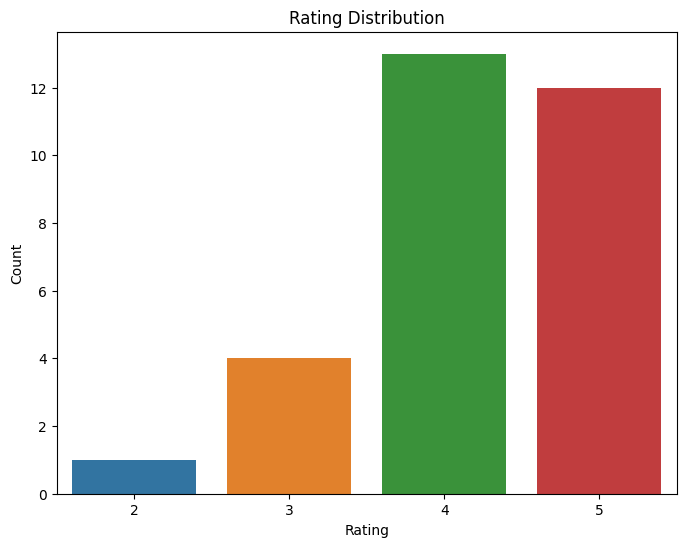

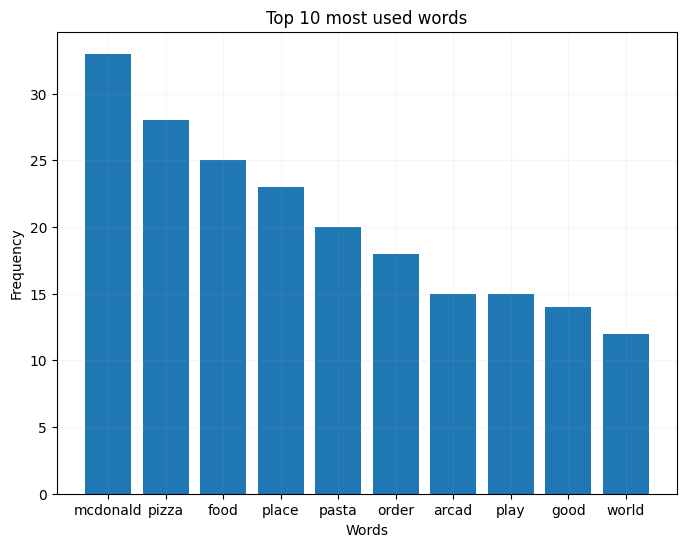

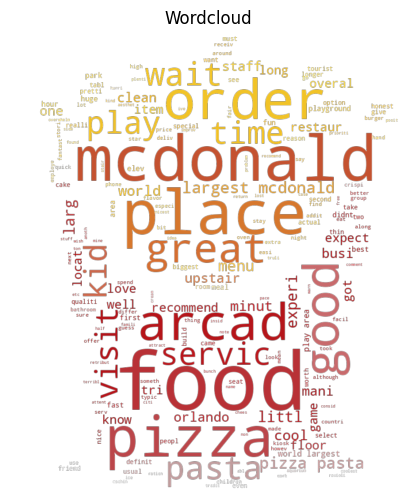

In [ ]:
data_highest = clean_text(data_highest)
Rating(data_highest)
Graph_Bar(data_highest)
Wordcloud(data_highest, mask_image_path="/kaggle/input/logomcd/kentanggoreng.png")

In [ ]:
# Menyimpan word cloud sebagai gambar
save_path = "/kaggle/working/wordcloud_mcdhighest.png"
plt.savefig(save_path, bbox_inches='tight', pad_inches=0.2)

<Figure size 640x480 with 0 Axes>

# Toko dengan rating_Count Terendah

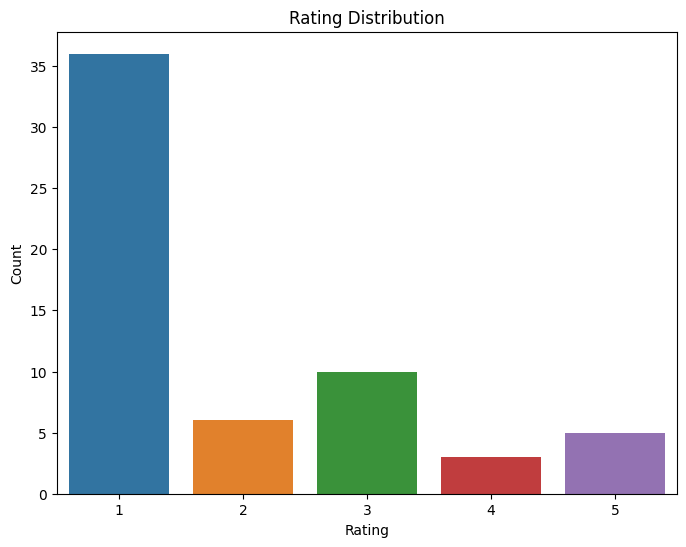

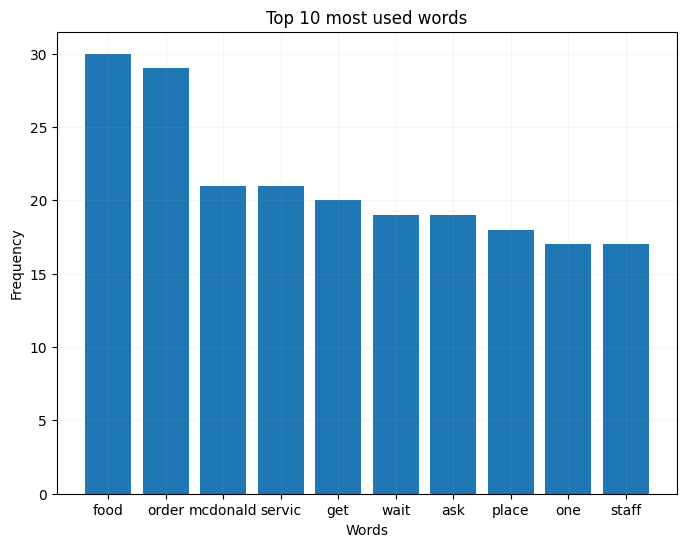

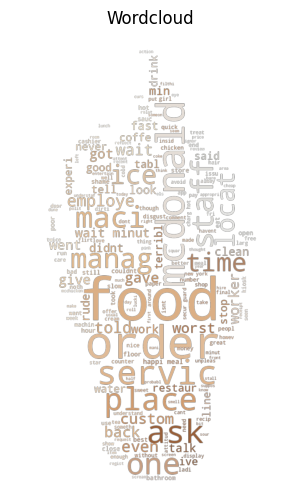

In [ ]:
data_lowest = clean_text(data_lowest)
Rating(data_lowest)
Graph_Bar(data_lowest)
Wordcloud(data_lowest, mask_image_path="/kaggle/input/logomcd/icecream.png")

In [ ]:
# Menyimpan word cloud sebagai gambar setelah memanggil fungsi
save_path = "/kaggle/working/wordcloud_mcdlowest.png"
plt.savefig(save_path, bbox_inches='tight', pad_inches=0.2)

<Figure size 640x480 with 0 Axes>